# Demo Notebook for the vivainsights Python package

This notebook provides a demo for the **vivainsights** package. For more information about the package, please see:
- [Documentation](https://microsoft.github.io/vivainsights-py/)
- [GitHub Page](https://github.com/microsoft/vivainsights-py/)


### Loading the library and dataset

The following code loads the library 'vivainsights', and the function `load_pq_data()` loads a sample Person Query data to the environment. The first five rows of the data looks like the following: 

In [ ]:
import vivainsights as vi

# load in-built datasets
pq_data = vi.load_pq_data() # load and assign in-built person query

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pq_data.head()

,PersonId,MetricDate,Collaboration_hours,Copilot_actions_taken_in_Teams,Meeting_and_call_hours,Internal_network_size,Email_hours,Channel_message_posts,Conflicting_meeting_hours,Large_and_long_meeting_hours,...,Summarise_chat_actions_taken_using_Copilot_in_Teams,Summarise_email_thread_actions_taken_using_Copilot_in_Outlook,Summarise_meeting_actions_taken_using_Copilot_in_Teams,Summarise_presentation_actions_taken_using_Copilot_in_PowerPoint,Summarise_Word_document_actions_taken_using_Copilot_in_Word,FunctionType,SupervisorIndicator,Level,Organization,LevelDesignation
0,bf361ad4-fc29-432f-95f3-837e689f4ac4,2024-03-31,17.452987,4,11.767599,92,7.523189,0.753451,2.079210,0.635489,...,2,0,0,0,0,Specialist,Manager,Level3,IT,Senior IC
1,0500f22c-2910-4154-b6e2-66864898d848,2024-03-31,32.860820,6,26.743370,193,11.578396,0.000000,8.106997,1.402567,...,2,0,4,1,0,Specialist,Manager,Level2,Legal,Senior Manager
2,bb495ec9-8577-468a-8b48-e32677442f51,2024-03-31,21.502359,8,13.982031,113,9.073214,0.894786,3.001401,0.000192,...,1,1,0,0,0,Manager,Manager,Level4,Legal,Junior IC
3,f6d58aaf-a2b2-42ab-868f-d7ac2e99788d,2024-03-31,25.416502,4,16.895513,131,10.281204,0.528731,1.846423,1.441596,...,0,0,0,0,0,Manager,Manager,Level1,HR,Executive
4,c81cb49a-aa27-4cfc-8211-4087b733a3c6,2024-03-31,11.433377,4,6.957468,75,5.510535,2.288934,0.474048,0.269996,...,0,0,1,0,0,Technician,Manager,Level1,Finance,Executive


### Run visuals

There are currently several visuals that you can run with the Person Query dataset. The first of these that you can run is a bar plot, which produces a person-average (first averaging by person, then averaging by group) for the groups in question. The parameters that you can provide to `create_bar()` are:

- `metric` - metric to analyze
- `hrvar` - grouping HR variable
- `mingroup` - minimum group size to display




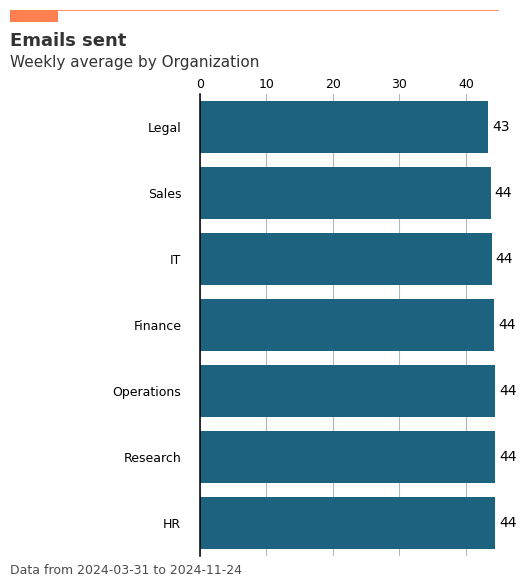

In [4]:
plot_bar = vi.create_bar(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5)

You can also ask the function to return a summary table by specifying the parameter `return_type`. This summary table can be copied to a clipboard with `export()`.

In [5]:
tb = vi.create_bar(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='table')
print(tb)

  Organization     metric   n
1           HR  44.423377  33
5     Research  44.364859  52
4   Operations  44.345455  22
0      Finance  44.213445  68
2           IT  43.871867  68
6        Sales  43.723077  13
3        Legal  43.328571  44


In [6]:
vi.export(tb)

Data frame copied to clipboard.
You may paste the contents directly to Excel.


()

Here are some other visual outputs, and their accompanying summary table outputs:

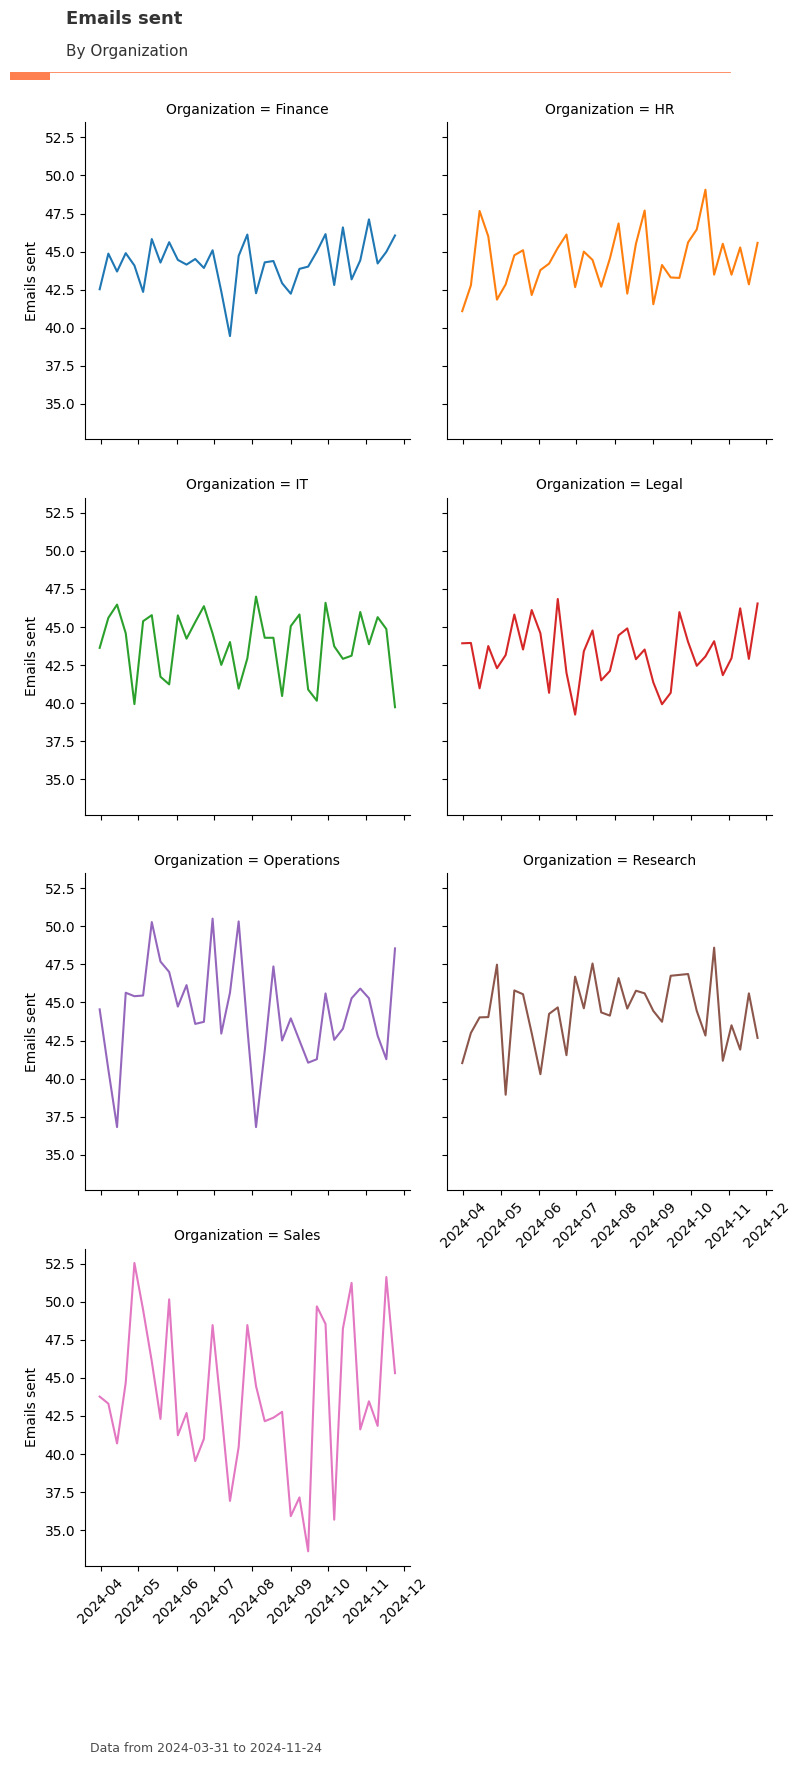

In [7]:
plot_line = vi.create_line(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='plot')

In [8]:
vi.create_line(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='table').head()

,MetricDate,Organization,metric,n
0,2024-03-31,Finance,42.529412,68
1,2024-03-31,HR,41.090909,33
2,2024-03-31,IT,43.632353,68
3,2024-03-31,Legal,43.931818,44
4,2024-03-31,Operations,44.545455,22


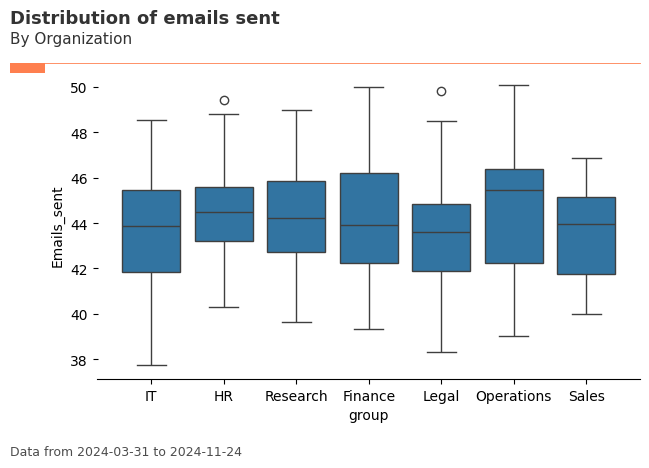

In [9]:
plot_box = vi.create_boxplot(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='plot')

In [10]:
vi.create_boxplot(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='table')

,index,group,mean,median,sd,min,max,n
0,0,Finance,44.213445,43.900000,2.446053,39.342857,50.000000,68
1,1,HR,44.423377,44.485714,2.140707,40.314286,49.428571,33
2,2,IT,43.871867,43.885714,2.565453,37.742857,48.542857,68
3,3,Legal,43.328571,43.585714,2.434427,38.314286,49.828571,44
4,4,Operations,44.345455,45.442857,3.152513,39.000000,50.085714,22
5,5,Research,44.364859,44.228571,2.276114,39.657143,48.971429,52
6,6,Sales,43.723077,43.971429,2.132463,40.000000,46.885714,13


## Exploratory data analysis

Some functions are designed to perform a rapid exploratory analysis of the dataset, and one of these functions is `create_rank()`. With `create_rank()`, you can explore all the groupings within your population and rank them with respect to a metric you choose. 

In [11]:
vi.create_rank(
    data=pq_data,
    metric='Collaboration_hours',
    hrvar = ['Organization', 'FunctionType', 'LevelDesignation', 'SupervisorIndicator'],
    mingroup=5,
    return_type = 'table'
)

,hrvar,attributes,metric,n
4,FunctionType,Technician,23.426417,292
0,LevelDesignation,Executive,23.285180,37
0,FunctionType,Advisor,23.252294,299
1,Organization,HR,23.249373,33
4,Organization,Operations,23.225234,22
5,Organization,Research,23.187623,52
0,Organization,Finance,23.100312,68
3,FunctionType,Specialist,23.092292,300
2,LevelDesignation,Senior IC,23.092287,87
0,SupervisorIndicator,IC,23.065672,34


This can be visualized as well:

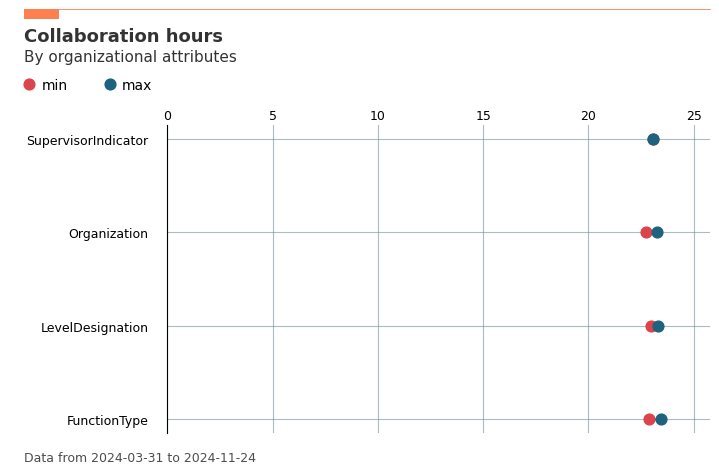

In [12]:
plot_rank = vi.create_rank(
    data=pq_data,
    metric='Collaboration_hours',
    hrvar = ['Organization', 'FunctionType', 'LevelDesignation', 'SupervisorIndicator'],
    mingroup=5,
    return_type = 'plot'
)

### Validating / exploring the data

Since HR variables or organizational attributes are a key part of the analysis process, it is also possible to perform some exploration or validation before we begin the analysis. 

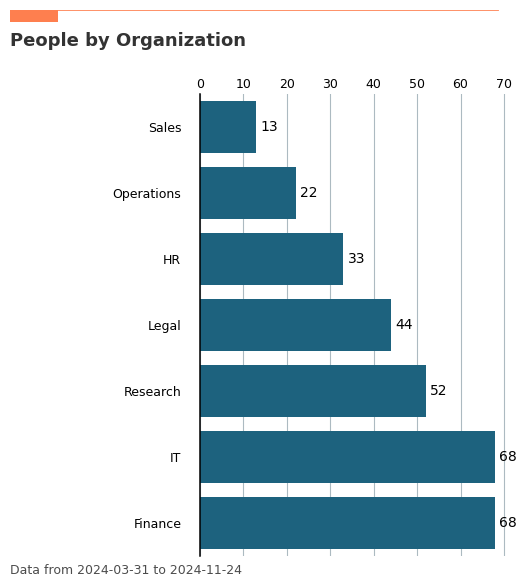

In [13]:
plot_hrcount = vi.hrvar_count(data=pq_data, hrvar='Organization', return_type='plot')

In [14]:
vi.hrvar_count(data=pq_data, hrvar='Organization', return_type='table')

,Organization,n
0,Finance,68
2,IT,68
5,Research,52
3,Legal,44
1,HR,33
4,Operations,22
6,Sales,13


## Additional Examples

Below are additional examples using the demo dataset `pq_data` for some of the newer functions in **vivainsights**.

### Bubble Plot: `create_bubble()`

The `create_bubble()` function visualizes the relationship between two metrics, with bubble size representing group size. This is useful for comparing two metrics across organizational groups.

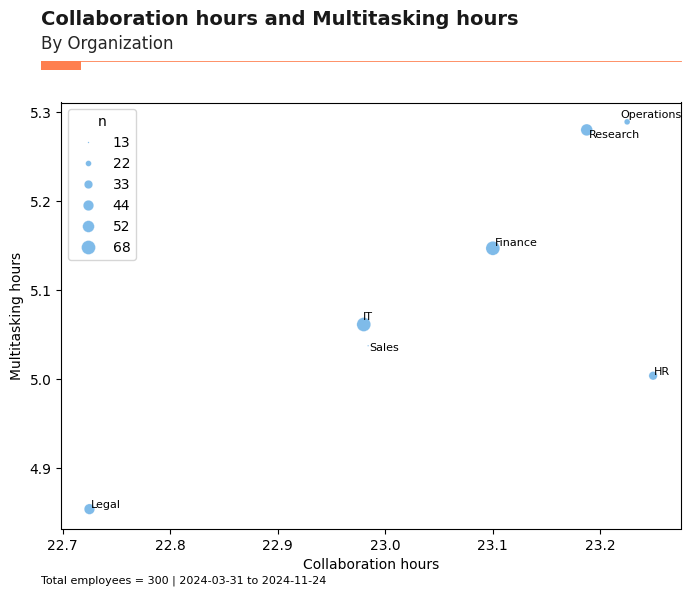

In [15]:
# Bubble plot: Collaboration_hours vs. Multitasking_hours by Organization
bubble_plot = vi.create_bubble(
    data=pq_data,
    metric_x="Collaboration_hours",
    metric_y="Multitasking_hours",
    hrvar="Organization",
    mingroup=5,
    return_type="plot"
)

### Trend Plot: `create_trend()`

The `create_trend()` function provides a week-by-week heatmap view of a selected metric, grouped by an HR attribute. This helps identify trends and hotspots over time.

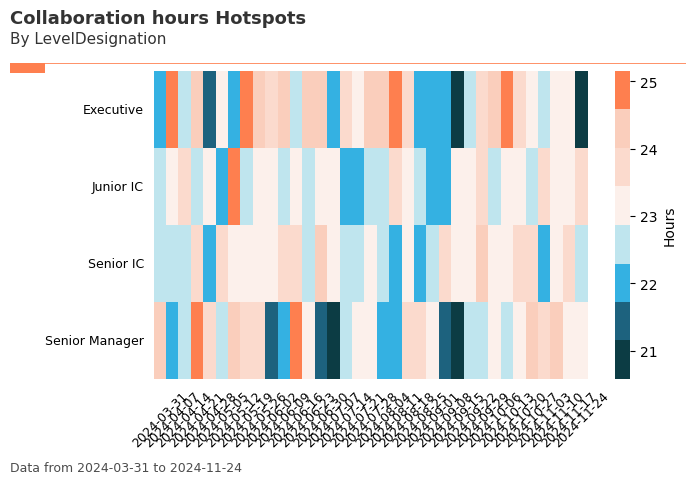

In [16]:
# Trend plot: Collaboration_hours by LevelDesignation
trend_plot = vi.create_trend(
    data=pq_data,
    metric="Collaboration_hours",
    hrvar="LevelDesignation",
    mingroup=5,
    return_type="plot"
)

### Key Metrics Scan: `keymetrics_scan()`

The `keymetrics_scan()` function summarizes multiple key metrics across a grouping variable, returning either a heatmap or a summary table. This is useful for a high-level scan of organizational health.

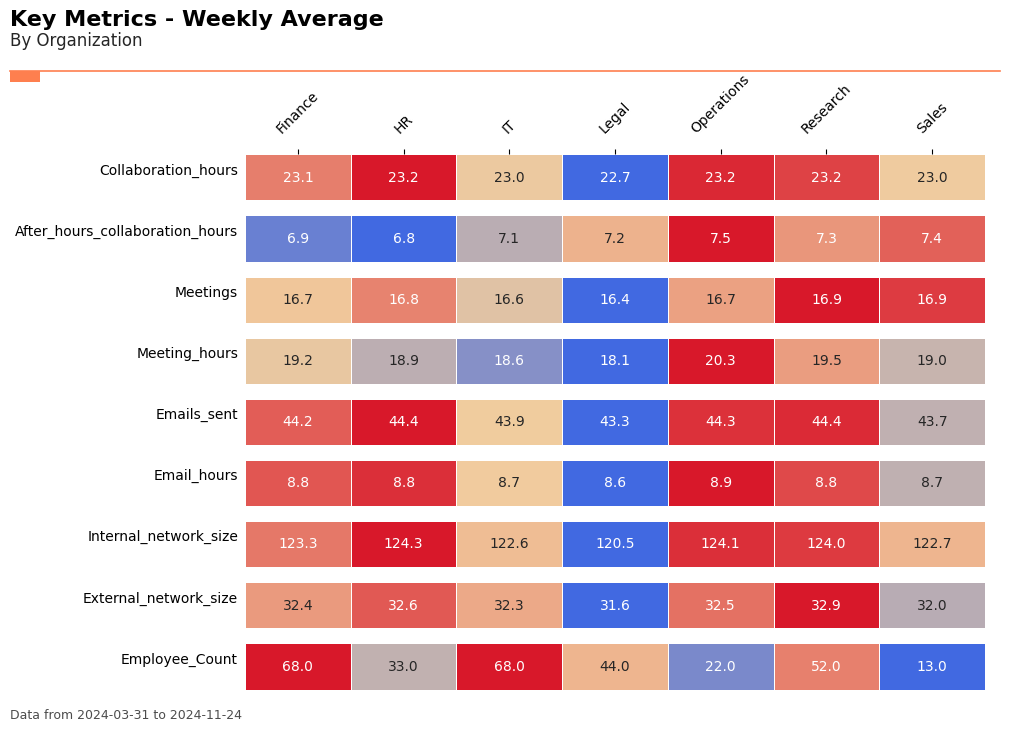

In [17]:
# Key metrics scan: heatmap by Organization
keymetrics_plot = vi.keymetrics_scan(
    data=pq_data,
    hrvar="Organization",
    mingroup=5,
    return_type="plot"
)

In [18]:
# Key metrics scan: summary table by Organization
keymetrics_table = vi.keymetrics_scan(
    data=pq_data,
    hrvar="Organization",
    mingroup=5,
    return_type="table"
)
keymetrics_table.head()

,Organization,Collaboration_hours,After_hours_collaboration_hours,Meetings,Meeting_hours,Emails_sent,Email_hours,Internal_network_size,External_network_size,Employee_Count
0,Finance,23.100312,6.917373,16.652941,19.172045,44.213445,8.818406,123.316807,32.385294,68
1,HR,23.249373,6.834921,16.757576,18.894323,44.423377,8.843827,124.337662,32.619913,33
2,IT,22.980218,7.079035,16.614569,18.561649,43.871867,8.743025,122.583193,32.331092,68
3,Legal,22.725075,7.239442,16.357143,18.121719,43.328571,8.627604,120.527922,31.561688,44
4,Operations,23.225234,7.540438,16.711688,20.339809,44.345455,8.858412,124.092208,32.531169,22
